# Лабораторная работа №3

Выполнено студентом группы 4117 Николаевым Дмитрием

 ## Цель работы

Изучение алгоритмов и методов регрессии на практике.

## Индивидуальное задание

Вариант 7 <br> 
Таблица для части 1 и части 2. <br>
<table> 
  <tr>
    <td>x1</td>
    <td>3</td>
    <td>3</td>
    <td>6</td>
    <td>6</td>
    <td>7</td>
    <td>8</td>
    <td>9</td>
    <td>9</td>
    <td>11</td>
    <td>12</td>
  </tr>
  <tr>
    <td>x2</td>
    <td>9</td>
    <td>8</td>
    <td>9</td>
    <td>7</td>
    <td>4</td>
    <td>5</td>
    <td>3</td>
    <td>5</td>
    <td>1</td>
    <td>0</td>
  </tr>
  <tr>
    <td>y</td>
    <td>20.9</td>
    <td>20.7</td>
    <td>20.8</td>
    <td>20.9</td>
    <td>22.8</td>
    <td>22.4</td>
    <td>24.5</td>
    <td>22.9</td>
    <td>22.7</td>
    <td>24.6</td>
  </tr>
</table><br>
Таблица для части 3. <br><br>
<table> 
 <tr>
    <td>x</td>
    <td>0</td> 
    <td>1</td> 
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
    <td>6</td>
    <td>7</td>
    <td>8</td>
    <td>9</td>
  </tr>
  <tr>
    <td>y</td>
    <td>12.7</td> 
    <td>20.0</td> 
    <td>24.9</td>
    <td>21.5</td>
    <td>21.3</td>
    <td>20.4</td>
    <td>13.4</td>
    <td>13.1</td>
    <td>4.0</td>
    <td>2.8</td>
  </tr>
</table>

## Ход работы

Перед выполнением задания были созданы по варианту массивы исходных данных.

In [413]:
import numpy as np 

x1 = np.array([3, 3, 6, 6, 7, 8, 9, 9, 11, 12])
x2 = np.array([9, 8, 9, 7, 4, 5, 3, 5, 1, 0])
y = np.array([20.9, 20.7, 20.8, 20.9, 22.8, 22.4, 24.5, 22.9, 22.7, 24.6])

### Часть 1

Для начала было проведено обучение модели простой (парной) линейной регрессии, используя для обучения значения `х1 ` и `y`. Для этого были взяты тренировочные данные - данные, на которых модель обучается. <br>
Далее с помощью класса `LinearRegression` и его метода `fit()` создается линейная регрессия, а к `x1` применяется функция `reshape()`, для того чтобы привести данные в двумерный массив.

In [414]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

model.fit(np.array(x1).reshape(-1,1), y) 

LinearRegression()

Далее с помощью функции `predict` производится предсказание данных для переменной. В переменной `predictions_valid` хранятся все предсказанные значения для `x1`

In [415]:
predictions_valid = model.predict(np.array(x1).reshape(-1,1))
predictions_valid

array([20.52475728, 20.52475728, 21.74878641, 21.74878641, 22.15679612,
       22.56480583, 22.97281553, 22.97281553, 23.78883495, 24.19684466])

Также был выведен датафрейм с истинными и предсказанными значениями, с использование библиотеки `pandas`. 

In [416]:
import pandas as pd
df = {
    "Actual": y,
    "Predicted": predictions_valid
}
df = pd.DataFrame(df)
df

,Actual,Predicted
0,20.9,20.524757
1,20.7,20.524757
2,20.8,21.748786
3,20.9,21.748786
4,22.8,22.156796
5,22.4,22.564806
6,24.5,22.972816
7,22.9,22.972816
8,22.7,23.788835
9,24.6,24.196845


По полученному датафрейму можно сделать вывод, что предсказание отличается от реальных значение зачастую меньше чем на одну еденицы. Для более подробного анадиза были выведены метрики качества регрессии (MSE, MAE, RMSE, R2). Для этого из библиотки `sklearn.metrics` были импортированы соответствующие методы.

In [417]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, predictions_valid)
mae = mean_absolute_error(y, predictions_valid)
rmse = np.sqrt(mse)
r2 = r2_score(y, predictions_valid)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.5918713592233014
Mean Absolute Error (MAE): 0.6248058252427189
Root Mean Squared Error (RMSE): 0.769331761480898
R-squared (R²): 0.6985784481445809


- MSE равно 0.592: Это означает, что среднеквадратичная ошибка предсказаний модели составляет примерно 1.1894 единицы. Меньшие значения MSE указывают на более точные предсказания. <br>
- MAE равно 0.625: Это средняя абсолютная ошибка предсказаний модели. MAE равно 0.625, что означает, что в среднем предсказания модели отличаются от реальных значений на 0.625 единицы.<br>
- RMSE равно 0.769: RMSE - это корень из MSE. Значение RMSE равно 0.769, что также указывает на среднюю ошибку предсказания модели.<br>
- R-squared (R²) равно 0.699: Коэффициент детерминации R² измеряет, насколько хорошо модель соответствует данным. Значение R² положительное и равно 0.699, что показывает что данные содержат линейную регрессию.

Затем были выведены коэффициенты a и b - коэффициенты линейной регрессии формулы - y = ax+b.

In [418]:
a = model.coef_
b = model.intercept_

print("Коэффициент a (при x1):", a)
print("Коэффициент b (свободный член):", b)

Коэффициент a (при x1): [0.40800971]
Коэффициент b (свободный член): 19.3007281553398


Исходя из данных коэффициентов: <br>
1. Коэффициент a равен примерно 0.408: Это означает, что каждое увеличение `x1` на одну единицу приводит к увеличению `y` на примерно 0.408 единицы. Таким образом, `x1` положительно влияет на `y`, и чем больше `x1`, тем больше `y`. <br>
2. Коэффициент b равен примерно 19.3: Это значение представляет собой значение `y`, когда все `x`-признаки равны нулю.

После был построен график "Регрессия: Точки и линия регрессии", который показывает расхождение прогнозируемых и реальных значений. График создавался с использованием библиотеки `matplotlib.pyplot` на основе предыдущих лабораторных работах.

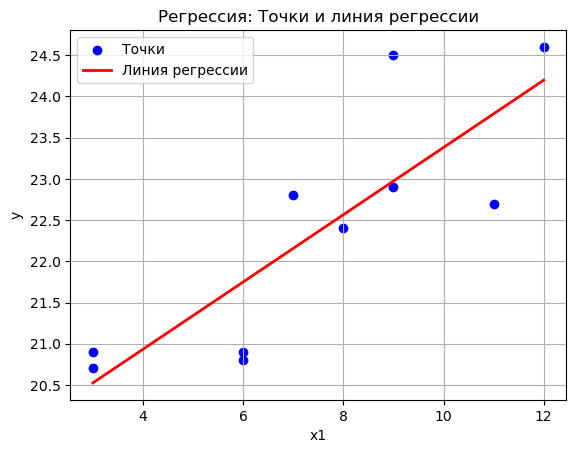

In [419]:
import matplotlib.pyplot as plt

plt.scatter(x1, y, color='blue', label='Точки')
plt.plot(x1, predictions_valid, color='red', linewidth=2, label='Линия регрессии')

plt.xlabel('x1')
plt.ylabel('y')
plt.title('Регрессия: Точки и линия регрессии')
plt.legend()
plt.grid(True)
plt.show()

Далее был построен график разницы между предсказанными и истинными значениями, для этого была вычислена разница из `predictions_valid`. 

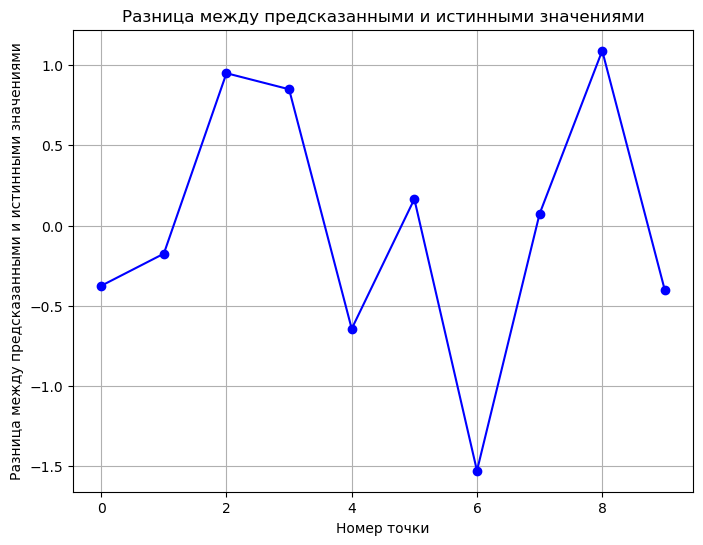

In [420]:
difference = predictions_valid - np.array(y)

plt.figure(figsize=(8, 6))
plt.plot(difference, marker='o', linestyle='-', color='b')
plt.xlabel('Номер точки')
plt.ylabel('Разница между предсказанными и истинными значениями')
plt.title('Разница между предсказанными и истинными значениями')
plt.grid(True)
plt.show()


Данный график показывает как отличаются значения реальные от предсказанных, с помощью данного графика можно выделить значения при которых модель ведет себя некорректно, такие значения будут резко вести график вниз или вверх. В данном примере таких значений не обнаружено.

Далеее

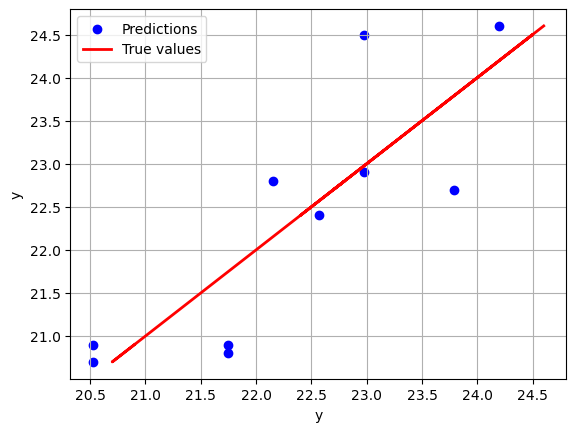

In [421]:
plt.scatter(predictions_valid, y, color='blue', label='Predictions')
plt.plot(y, y, color='red', linewidth=2, label='True values')

plt.xlabel('y')
plt.ylabel('y')
plt.title('')
plt.legend()
plt.grid(True)
plt.show()

Построенная модель простой линейной регрессии демонстрирует разумное качество предсказания для данного набора данных. Это подтверждается следующими аспектами:<br>
- Метрики качества модели: Значения MSE, MAE и RMSE довольно низкие (0.5919, 0.6248 и 0.7693 соответственно), что указывает на небольшие ошибки предсказаний модели. Также коэффициент детерминации R² имеет значительное значение (0.6986), что говорит о том, что модель объясняет почти 70% дисперсии данных.<br>
- Коэффициенты модели: Полученные коэффициенты `a` (наклон прямой регрессии) и `b` (свободный член) составляют 0.4080 и 19.3007 соответственно. Это означает, что каждое изменение в `x1` на единицу приводит к увеличению `y` на приблизительно 0.4080 единиц, и `y` равно 19.3007, когда `x1` равно 0.<br>
- Графическое представление: График, на котором точки (истинные значения) и линия регрессии (предсказанные значения) расположены достаточно близко друг к другу, что указывает на хорошее соответствие между предсказанными и реальными данными.<br><br>
В целом, модель показывает способность предсказывать зависимую переменную `y` на основе входной переменной `x1` с разумной точностью

### Часть 2

Для начала массив `x1` и `x2` были объединены в массив формы (10, 2).

In [422]:
X = np.column_stack((x1, x2))
X

array([[ 3,  9],
       [ 3,  8],
       [ 6,  9],
       [ 6,  7],
       [ 7,  4],
       [ 8,  5],
       [ 9,  3],
       [ 9,  5],
       [11,  1],
       [12,  0]])

Далее аналогично предыдущему заданию модель множественной линейной регрессии была обучена от двух предикторов `х`. И также на основе предыдущего задания было выполнено предсказание.

In [423]:
model = LinearRegression()
model.fit(X, y)
predictions_valid = model.predict(X)
predictions_valid

array([20.63866588, 20.97388261, 20.89365829, 21.56409175, 22.65473942,
       22.40452016, 23.15995109, 22.48951763, 24.00037949, 24.42059369])

Аналогично был выведен датафрейм с предсказанными и истинными значениями.

In [424]:
df = {
    "Actual": y,
    "Predicted": predictions_valid
}
df = pd.DataFrame(df)
df

,Actual,Predicted
0,20.9,20.638666
1,20.7,20.973883
2,20.8,20.893658
3,20.9,21.564092
4,22.8,22.654739
5,22.4,22.404520
6,24.5,23.159951
7,22.9,22.489518
8,22.7,24.000379
9,24.6,24.420594


После были подсчитаны и выведены метрики качества регрессии (MSE, MAE, RMSE, R2) и значение коэффициентов а и b. 

In [425]:
mse = mean_squared_error(y, predictions_valid)
mae = mean_absolute_error(y, predictions_valid)
rmse = np.sqrt(mse)
r2 = r2_score(y, predictions_valid)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.4301618316748188
Mean Absolute Error (MAE): 0.467306459773992
Root Mean Squared Error (RMSE): 0.6558672363175484
R-squared (R²): 0.7809320474257392


In [426]:
a = model.coef_
b = model.intercept_

print("Коэффициент a (при x1):", a)
print("Коэффициент b (свободный член):", b)

Коэффициент a (при x1): [ 0.08499747 -0.33521673]
Коэффициент b (свободный член): 23.4006240512734


Был построен график с разницей предсказанного и истинного значения по каждой точке. Для этого была вычислена разница `differences`.

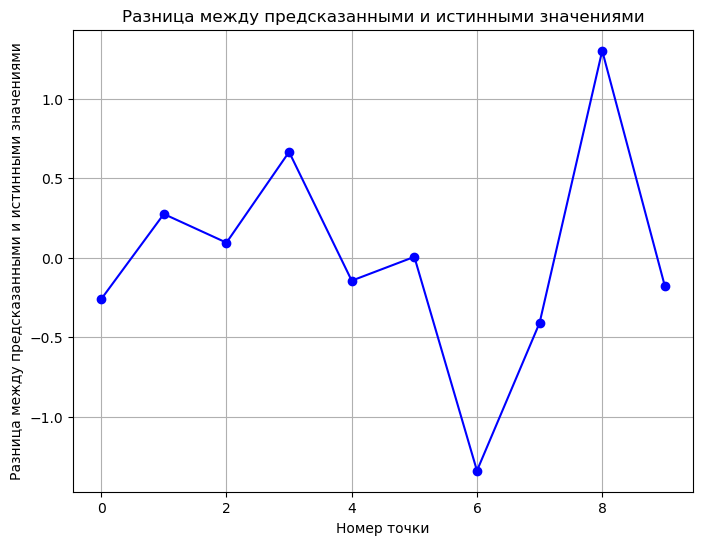

In [427]:
difference = predictions_valid - np.array(y)

plt.figure(figsize=(8, 6))
plt.plot(difference, marker='o', linestyle='-', color='b')
plt.xlabel('Номер точки')
plt.ylabel('Разница между предсказанными и истинными значениями')
plt.title('Разница между предсказанными и истинными значениями')
plt.grid(True)
plt.show()

После обучения модели множественной линейной регрессии, которая зависит от двух предикторов `x1` и `x2`, было выявлено, что после добавления второго предиктора, метрики качества регрессии (MSE, MAE, RMSE) стали меньше, что говорит о более точном прогнозировании значений, как и метрика R2 приблизилась к 1, что показывает насколько хорошо модель соответствует данным. Коэффициенты позволяют понимать, как каждый из предикторов влияет на зависимую переменную `y`. Коэффициент при `x1` положительный, что означает положительную корреляцию с `y`, в то время как коэффициент при `x2` отрицательный, что указывает на отрицательную корреляцию с `y`. Свободный член указывает на значение `y`, когда оба `x1` и `x2` равны нулю. <br>
При добавлении второго предиктора, модель стала линейно зависить от двух параметров. Таким образом, модель линейной регрессии стала лучше соответствовать данным и способна точнее предсказывать `y` на основе значений `x1` и `x2`, что и видно сравнивая два графика.



### Часть 3

Для начала введем новый `x` и `y`.

In [428]:
y = np.array([12.7, 20.0, 24.9, 21.5, 21.3, 20.4, 13.4, 13.1, 4.0, 2.8])
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Для реализации модели полиномиальной регрессии с использованием `PolynomialFeatures` необходимо выбрать подходящую степень полинома. Выбор степени полинома зависит от структуры данных и ожидаемой сложности зависимости между переменными. Степень полинома определяет, насколько сложные нелинейные взаимосвязи могут быть учтены в модели.<br>
Выборка проводилась в диапазоне от 2 до 5 и выбрана была степень с лучшим результатом метрики качества модели MSE.<br>
Для создания модели полиномиальной регрессии использова функция `poly.fit_transform` - преобразователь, который преобразует матрицу входных данных в новую матрицу данных заданной степени.

In [429]:
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(np.array(x).reshape(-1,1), y, test_size=0.25, random_state=42)

best_degree = None
best_mse = float('inf')

for degree in range(2, 5):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(np.array(x).reshape(-1,1))
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    y_pred = model.predict(X_poly)
    
    mse = mean_squared_error(y, y_pred)
    
    if mse < best_mse:
        best_mse = mse
        best_degree = degree

print("Лучшая степень полинома:", best_degree)
print("Лучшее MSE:", best_mse)


Лучшая степень полинома: 4
Лучшее MSE: 2.422917832167838


По результатам степенью полинома была выбрана - 4. 

Далее было проведено обучение модель полиномиальной регрессии и выполнено ее предсказание.

In [430]:
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(np.array(x).reshape(-1,1))

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pred_poly = lin_reg.predict(X_poly)
y_pred_poly

array([12.91713287, 20.00244755, 23.21590909, 23.53700466, 21.80641026,
       18.72599068, 14.85879953, 10.62907925,  6.32226107,  2.08496503])

Далее вычисляем метрики MAE, R².

In [431]:
mae_poly = mean_absolute_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)
mse_poly = mean_squared_error(y, y_pred_poly)

print("Mean Absolute Error (MAE):", mae_poly)
print("Mean Absolute Error (MAE):", mse_poly)
print("R-squared (R²):", r2_poly)

Mean Absolute Error (MAE): 1.3088111888110774
Mean Absolute Error (MAE): 2.422917832167838
R-squared (R²): 0.9528366544974523


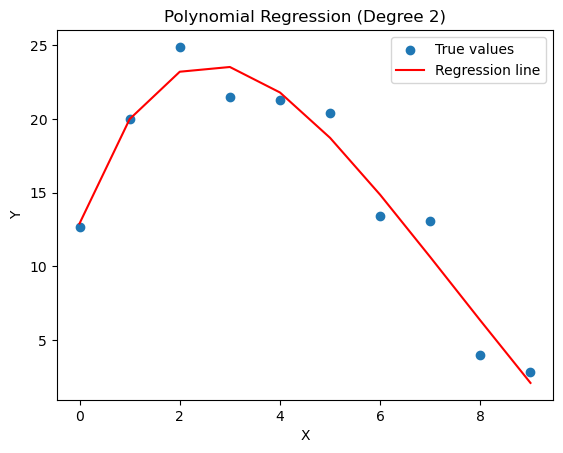

In [432]:
plt.scatter(np.array(x).reshape(-1,1), y, label="True values")
plt.plot(np.array(x).reshape(-1,1), y_pred_poly, color='red', label="Regression line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()

Тоже самое было сделано для степени полинома 2 и 3.

Mean Absolute Error (MAE): 1.8593333333333313
Mean Absolute Error (MAE): 5.198137878787875
R-squared (R²): 0.8988155646500806


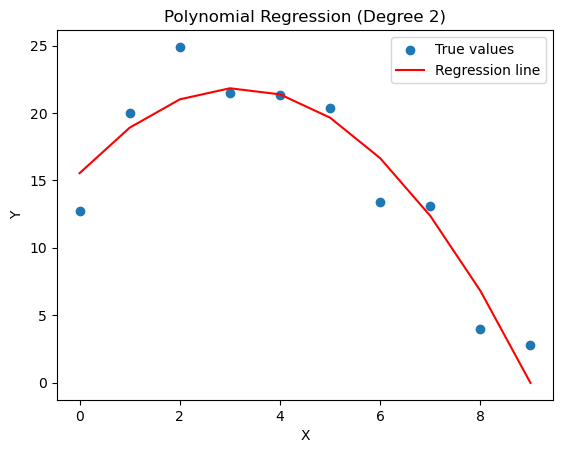

In [433]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(np.array(x).reshape(-1,1))

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pred_poly = lin_reg.predict(X_poly)

mae_poly = mean_absolute_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)
mse_poly = mean_squared_error(y, y_pred_poly)

print("Mean Absolute Error (MAE):", mae_poly)
print("Mean Absolute Error (MAE):", mse_poly)
print("R-squared (R²):", r2_poly)

plt.scatter(np.array(x).reshape(-1,1), y, label="True values")
plt.plot(np.array(x).reshape(-1,1), y_pred_poly, color='red', label="Regression line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()

Mean Absolute Error (MAE): 1.3638461538461546
Mean Absolute Error (MAE): 2.4780258741258714
R-squared (R²): 0.9517639480324087


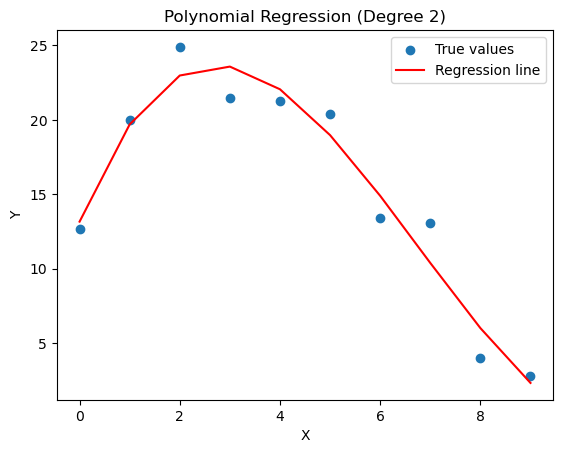

In [434]:
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(np.array(x).reshape(-1,1))

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pred_poly = lin_reg.predict(X_poly)

mae_poly = mean_absolute_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)
mse_poly = mean_squared_error(y, y_pred_poly)

print("Mean Absolute Error (MAE):", mae_poly)
print("Mean Absolute Error (MAE):", mse_poly)
print("R-squared (R²):", r2_poly)

plt.scatter(np.array(x).reshape(-1,1), y, label="True values")
plt.plot(np.array(x).reshape(-1,1), y_pred_poly, color='red', label="Regression line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()

Сравнивая данные графики видно, что действительно при степени полинома равной 4, точки предсказаний находятся ближе к реальным. Сравнивая MSE и R² можно сказать тоже самое. В целом, при всех выбранных метриках, прогнозируемые значения близки к реальным, что доказывает работоспособность модели.

### Часть 4

Для начала был загружен набор данных `car_price.csv`.

In [435]:
df = pd.read_csv('car_price.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


В качестве целевой переменной был выбран столбец `price`, так как именно цена наиболее интересна в качестве прогнозирования, цена автомобиля является ключевым показателем, который интересует потенциальных покупателей и продавцов.

Далее для выбранной целевой переменной `price` были построены гистограмма и boxplot. С помощью данных графиков можно увидеть какая цена вчтречается чаще всего.  

Text(0, 0.5, 'Частота')

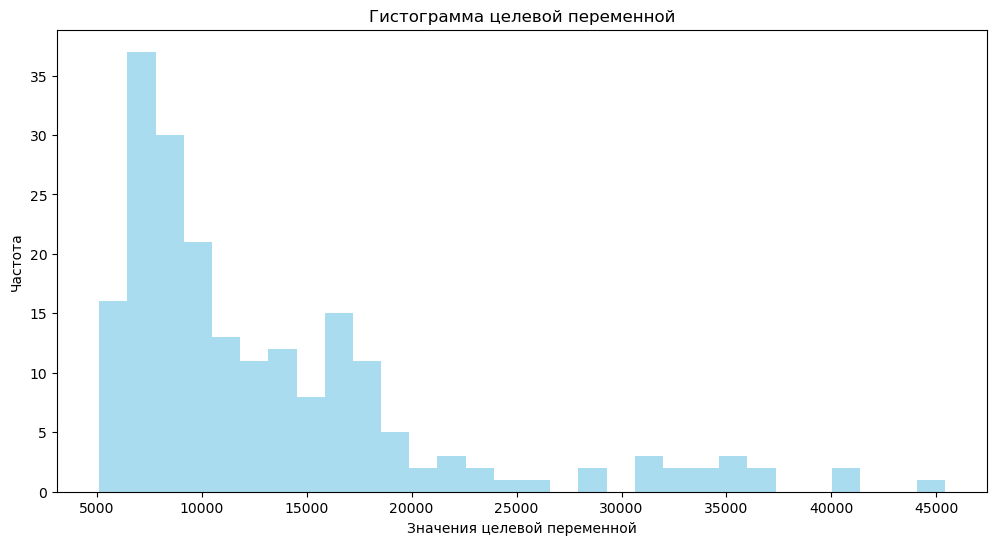

In [436]:
plt.figure(figsize= (12, 6))
plt.hist(df['price'], bins=30, color='skyblue', alpha=0.7)
plt.title('Гистограмма целевой переменной')
plt.xlabel('Значения целевой переменной')
plt.ylabel('Частота')

Text(0, 0.5, 'Цена')

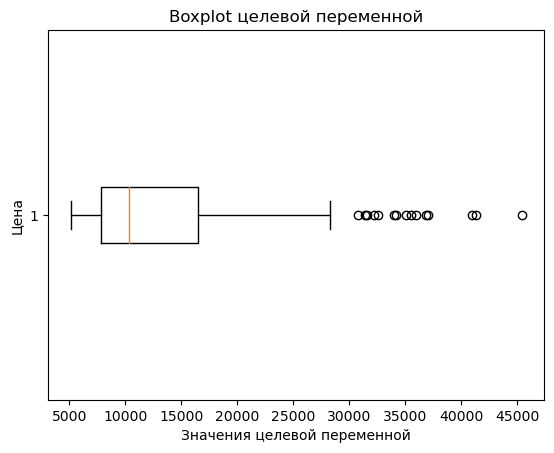

In [437]:
plt.boxplot(df['price'], vert=False)
plt.title('Boxplot целевой переменной')
plt.xlabel('Значения целевой переменной')
plt.ylabel('Цена')

По данным графикам можно сказать, что чаще всего машины стоят в диапазоне от 5.000 до 15.000.

Далее была построена матрица диаграм рассеивания для 'horsepower', 'citympg', 'price', 'enginesize' по 'price'.

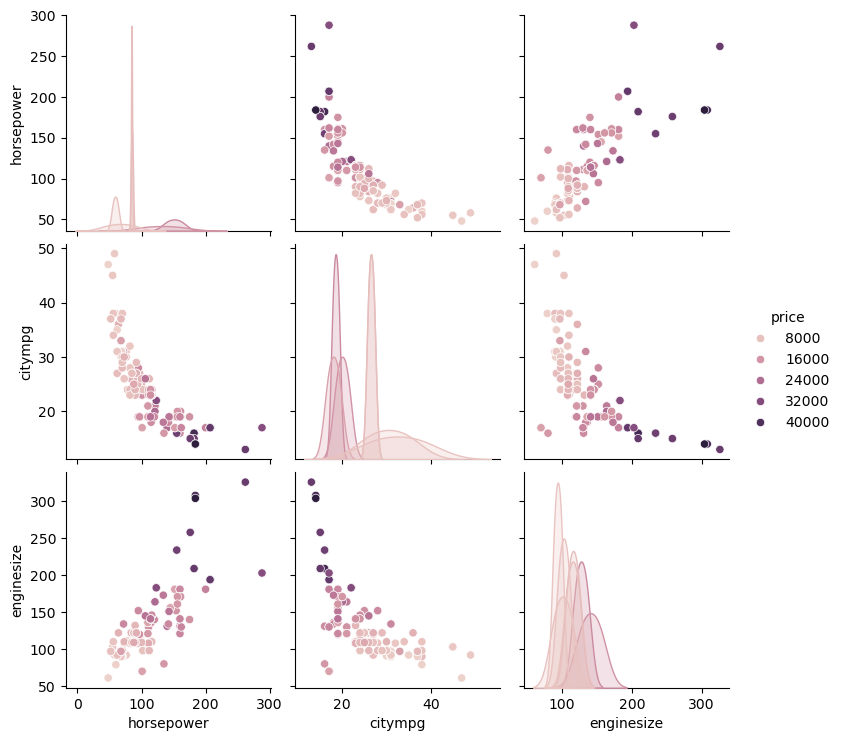

In [438]:
import seaborn as sns
sns.pairplot(df[['horsepower', 'citympg', 'price', 'enginesize']], hue = 'price')

Из графиков видно, что на цену линейно влияет 'horsepower' и 'enginesize', то есть при увеличении данных переменных растет и цена.

Далее для деления данных на обучающие и валидационные сначала были выделены числовые столбцы.

In [439]:
df_param = df[['symboling', 'wheelbase', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
                 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
df_param
df2 = df.query('price < 25000')
df_param2 = df2[['symboling', 'wheelbase', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
                 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

Для деления данных была использована функция `train_test_split`, в которой параметр `random_state` позволяет получать повторяемые результаты при каждом запуске модели, а сама же модель делится 3 к 1, где 3 - обучающие данные.

In [440]:
X = df_param
y = df['price']

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                        y,  
                                                        test_size=0.25, 
                                                        random_state=0)

X2 = df_param2
y2 = df2['price']

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, 
                                                        y2,  
                                                        test_size=0.25, 
                                                        random_state=0)

После была проведена нормализация данных через `fit_transform` и была обучена модель линейной регрессии с помощью `LinearRegression`.

In [441]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.fit_transform(X_valid)

model = LinearRegression()
model.fit(X_train, y_train)

y_predictions = model.predict(X_valid)

X_train2 = sc.fit_transform(X_train2)
X_valid2 = sc.fit_transform(X_valid2)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

y_predictions2 = model2.predict(X_valid2)

Также был осуществлен подбор оптимальных параметров с помощью `GridSearchCV`, где `parametrs` - словарь с названиями гиперпараметрамов и всеми наборами значений, `scoring` - функция, которая минимизируется в ходе кросс-валидации (метрика ошибки), `cv` - количество частей, на которые поделена выборка (кросс-валидация)
 

In [442]:
from sklearn.model_selection import GridSearchCV

parametrs = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid = GridSearchCV(model, parametrs, scoring="neg_mean_squared_error", cv=5)
grid.fit(X_train, y_train)
grid.best_params_

{'fit_intercept': True, 'positive': True}

1. `fit_intercept`: В случае линейной регрессии, параметр fit_intercept указывает, включать ли в модель свободный член (intercept) или нет. True означает, что свободный член включен, а False - что он исключен.
2. `positive`: Параметр указывает, допустимы ли только положительные предсказания. Если positive установлен в True, это означает, что модель должна делать только положительные предсказания, а если установлен в False, то модель может предсказывать как положительные, так и отрицательные значения.

Были выведены метрики MSE, MAE, RMSR и R2.

In [443]:
mae = mean_absolute_error(y_valid, y_predictions)
mse = mean_squared_error(y_valid, y_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2) Score:", r2)
print()

mae = mean_absolute_error(y_valid2, y_predictions2)
mse = mean_squared_error(y_valid2, y_predictions2)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid2, y_predictions2)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error: 2507.280889534159
Mean Squared Error: 12827822.331199877
Root Mean Squared Error: 3581.594942368536
R-squared (R2) Score: 0.8279715455543611

Mean Absolute Error: 2078.5336478566724
Mean Squared Error: 7349143.614489387
Root Mean Squared Error: 2710.930396467122
R-squared (R2) Score: 0.6692506777277785


MAE имеет значение примерно 2500, что указывает среднию разницу между предсказанными и реальными значениями, учитывая, что цена от 5000 до 45000, то значение не слишком большое.<br>
MSE и RMSE же имеют большее отклонение, что указывает нв наличие больших ошибок в некоторых прогнозах. <br>
R2 равное 0.828 указывает на то, что около 82.8% дисперсии в цене автомобилей может быть объяснено моделью, получается что модель обладает неплохой объясняющей способностью.

Далее был создан датафрейм с истинными и предсказанными значениями.

In [444]:
results_df = pd.DataFrame({'True Values': y_valid, 'Predicted Values': y_predictions})
print(results_df.head())

     True Values  Predicted Values
52        6795.0       5756.782810
181      15750.0      20164.812628
5        15250.0      16103.215679
18        5151.0        -71.325031
188       9995.0      12235.636131


Видно, что есть предсказанные данные, которые почти совпадают с реальными, а есть и наоборот, которые сильно отличаются.

Далее был создан датафрейм с признаками и значением коэффициентов для каждого признака

In [445]:
coefficients_df = pd.DataFrame({'Feature': df_param.columns, 'Coefficient': model.coef_})
print(coefficients_df)


            Feature  Coefficient
0         symboling   658.818322
1         wheelbase  1685.346307
2        enginesize  4396.219655
3         boreratio  -407.754487
4            stroke  -958.585593
5  compressionratio  1596.073377
6        horsepower  1979.534022
7           peakrpm   942.983449
8           citympg -2040.602269
9        highwaympg  1305.607346


Положительные коэффициенты указывают на то, что при увеличении данного параметра увеличивается и цена, отрицательные же наоборот при увеличении параметра - уменьшают цену. Можно сделать вывод, что машины имеющие больший пробег, ход поршня и коэффициент расточки вагона увеличивают его стоимость, остальные же параметры уменьшают.  

Была выполнена визуализация - отображено на графике фактическое и предсказанное значение.

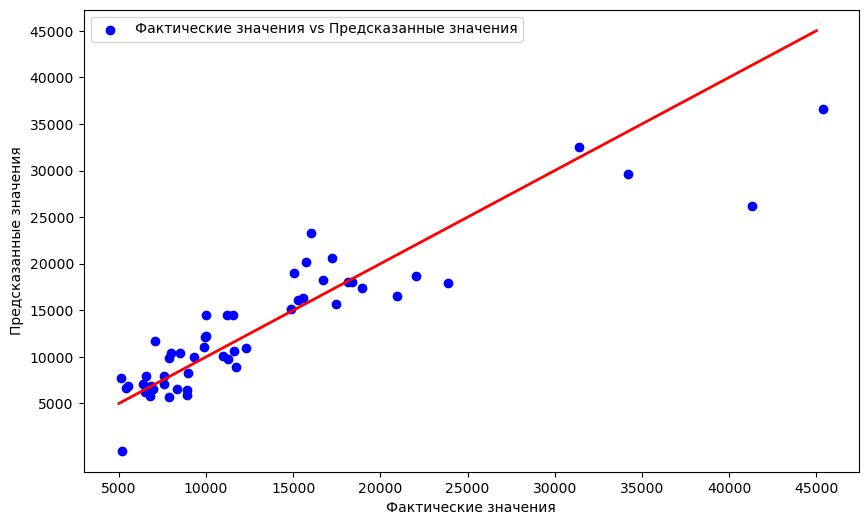

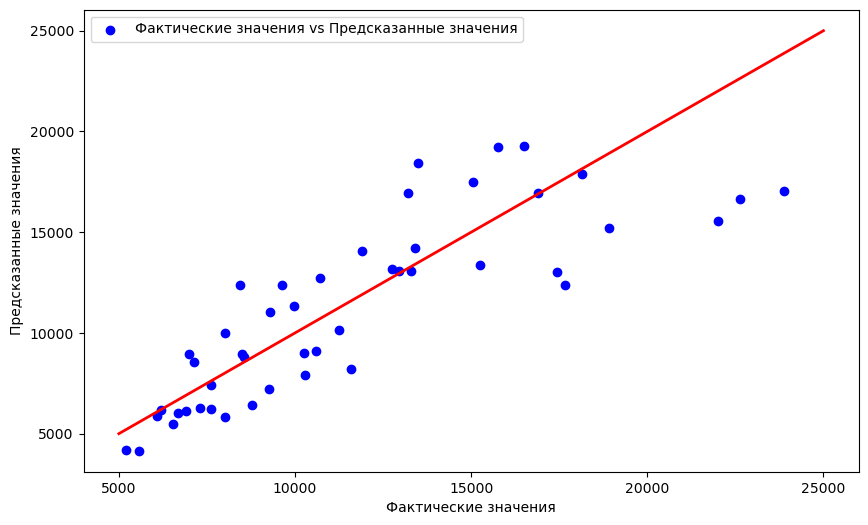

In [446]:
value = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000]

plt.figure(figsize=(10, 6))
plt.plot(value, value, color='red', linewidth=2)
plt.scatter(y_valid, y_predictions, c='blue', label='Фактические значения vs Предсказанные значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.xticks(value)
plt.yticks(value) 
plt.legend()
plt.show()

value2 = [5000, 10000, 15000, 20000, 25000]

plt.figure(figsize=(10, 6))
plt.plot(value2, value2, color='red', linewidth=2)
plt.scatter(y_valid2, y_predictions2, c='blue', label='Фактические значения vs Предсказанные значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.xticks(value2)
plt.yticks(value2) 
plt.legend()
plt.show()

In [447]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Из графика можно сделать вывод, что предсказанное значение зачастую выше истинного, но все же близко к нему.

Также была реализована регрессия методом k-ближайших соседей и деревом решений, затем были подсчитаны их метрики. Для подсчета регрессии использовались библиотеки `KNeighborsRegressor` и `DecisionTreeRegressor`. Описание кода продемонстрировано в комментариях.

In [448]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Инициализация моделей
knn_model = KNeighborsRegressor(n_neighbors=5)  # Пример, можно выбрать другое количество соседей
dt_model = DecisionTreeRegressor()

# Обучение моделей
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Предсказания для K-ближайших соседей и дерева решений
knn_predictions = knn_model.predict(X_valid)
dt_predictions = dt_model.predict(X_valid)

# Расчет метрик для K-ближайших соседей и дерева решений
knn_mae = mean_absolute_error(y_valid, knn_predictions)
knn_mse = mean_squared_error(y_valid, knn_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_valid, knn_predictions)

dt_mae = mean_absolute_error(y_valid, dt_predictions)
dt_mse = mean_squared_error(y_valid, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_valid, dt_predictions)

print("K-ближайших соседей:")
print("Mean Absolute Error:", knn_mae)
print("Mean Squared Error:", knn_mse)
print("Root Mean Squared Error:", knn_rmse)
print("R-squared (R2) Score:", knn_r2)

print("\nДерево решений:")
print("Mean Absolute Error:", dt_mae)
print("Mean Squared Error:", dt_mse)
print("Root Mean Squared Error:", dt_rmse)
print("R-squared (R2) Score:", dt_r2)

K-ближайших соседей:
Mean Absolute Error: 2476.031407692308
Mean Squared Error: 16295869.164810598
Root Mean Squared Error: 4036.8142346175155
R-squared (R2) Score: 0.7814630485291034

Дерево решений:
Mean Absolute Error: 2312.7692307692305
Mean Squared Error: 10871192.123931624
Root Mean Squared Error: 3297.1490903402632
R-squared (R2) Score: 0.8542110787960508


По данным результатам можно сказать, что метод дерева решений справился лучше, так как R2 ближе к 1, а MSE, RMSE и MAE меньше.

Также был построен график фактического и предсказанного значения для регрессия методом k-ближайших соседей, деревом решений и линейной.

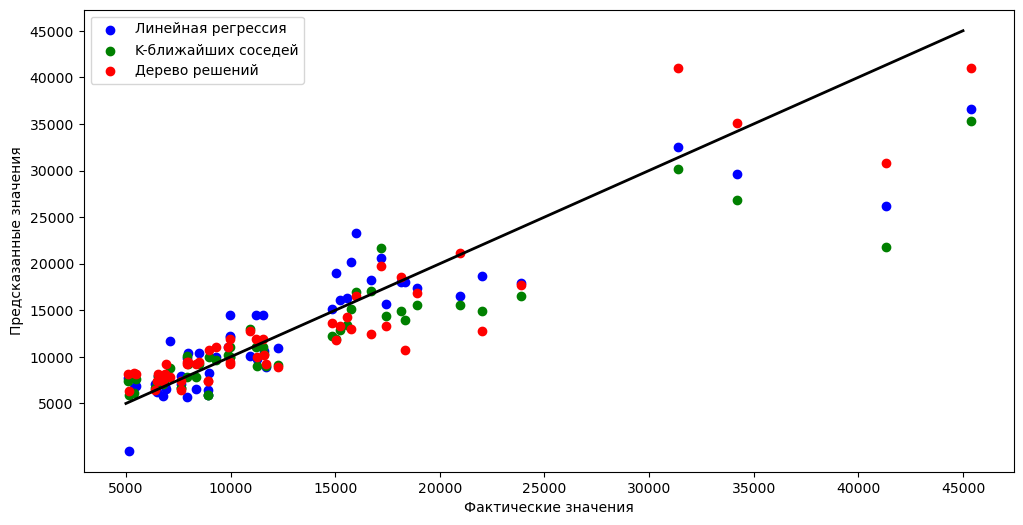

In [449]:
value = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000]

plt.figure(figsize=(12, 6))
plt.plot(value, value, color='black', linewidth=2)
plt.scatter(y_valid, y_predictions, c='blue', label='Линейная регрессия')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.scatter(y_valid, knn_predictions, c='green', label='K-ближайших соседей')
plt.scatter(y_valid, dt_predictions, c='red', label='Дерево решений')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.xticks(value)
plt.yticks(value) 
plt.show()


График также подтверждает, что метод дерево решений предсказанные значения ближе к истинным. 

1. Метод линейной регрессии: Линейная регрессия подходит для первоначального анализа данных, но может быть недостаточно гибкой для сложных зависимостей.
2. Метод ближайших соседей: Хороший метод для нелинейных зависимостей, но требует аккуратного подбора параметров.
3. Метод дерева решений: Дает хорошие результаты в данном случае. Важно контролировать глубину дерева и другие параметры, чтобы избежать переобучения.  <br>

Целесообразно использовать метод дерева решений, так как он обладает хорошей способностью к адаптации к нелинейным зависимостям и показывает лучшие результаты на данном наборе данных.

## Вывод

В данной работе был проведен обширный анализ данных с использованием различных статистических и машинного обучения методов. <br>
В первых трех частях, были выполнены задания, позволяющие научится различным методам машинного обучения. В последней же части были пременены навыки на обширном наборе данных. А именно: <br>
1. Предобработка данных: Первоначально был загружен и проанализирован набор данных car_price.csv. После этого была выбрана целевая переменная - price, которую следовало предсказать. Проведен анализ гистограммы и boxplot, что позволило понять распределение цен и выявить возможные выбросы в данных.
2. Визуализация и анализ взаимосвязей: Была построена матрица диаграмм рассеивания для нескольких признаков относительно цены. Анализируя эти графики, было выявлено, что horsepower и enginesize имеют линейную зависимость с ценой, что подтверждает их важность как предсказательных признаков.
3. Подготовка данных и обучение модели: Данные были разделены на обучающую и тестовую выборки, а затем стандартизированы с использованием StandardScaler. Затем была применена модель линейной регрессии с оптимизацией гиперпараметров через GridSearchCV. Результаты указывают на то, что модель имеет хорошую способность объяснения вариации цен автомобилей, с коэффициентом детерминации R2, близким к 0.83.
4. Сравнение с другими моделями: Дополнительно были реализованы регрессия методом k-ближайших соседей и деревом решений. Сравнение моделей показало, что дерево решений дает более точные прогнозы, что подчеркивает его эффективность в данной задаче.
5. Анализ важности признаков: С помощью коэффициентов регрессии была оценена важность признаков. Horsepower, enginesize, citympg, и highwaympg оказались наиболее важными признаками, влияющими на цену автомобиля.

Работа продемонстрировала важность анализа данных и выбора правильных признаков для построения точных моделей прогнозирования. Использование метода дерева решений в данной задаче позволило достичь наилучших результатов. Однако, всегда стоит продолжать эксперименты с различными моделями и параметрами, чтобы улучшить точность прогнозов в будущем.